# Imports

In [16]:
# Data
import pandas as pd
import numpy as np

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Matrcis
from sklearn.metrics import mean_squared_error


# Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import sklearn.impute
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder


# Models
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import catboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.regression.linear_model as stat_lin
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

# AutoML
import autogluon

# XAI
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
from sklearn.inspection import permutation_importance
from interpret.blackbox import LimeTabular
import shap


# Data

In [7]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.shape

(2938, 22)

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

There is some random space in the names of the columns. That is going to be anoying later.

In [10]:
rename_dict = {}
for var in df.columns:
    var_list = var.split(" ")
    var_list = [string for string in var_list if string != ""]
    new_var = ("_").join(var_list).lower()
    rename_dict[var] = new_var

rename_dict


{'Country': 'country',
 'Year': 'year',
 'Status': 'status',
 'Life expectancy ': 'life_expectancy',
 'Adult Mortality': 'adult_mortality',
 'infant deaths': 'infant_deaths',
 'Alcohol': 'alcohol',
 'percentage expenditure': 'percentage_expenditure',
 'Hepatitis B': 'hepatitis_b',
 'Measles ': 'measles',
 ' BMI ': 'bmi',
 'under-five deaths ': 'under-five_deaths',
 'Polio': 'polio',
 'Total expenditure': 'total_expenditure',
 'Diphtheria ': 'diphtheria',
 ' HIV/AIDS': 'hiv/aids',
 'GDP': 'gdp',
 'Population': 'population',
 ' thinness  1-19 years': 'thinness_1-19_years',
 ' thinness 5-9 years': 'thinness_5-9_years',
 'Income composition of resources': 'income_composition_of_resources',
 'Schooling': 'schooling'}

In [11]:
df = df.rename(columns = rename_dict)

In [12]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [13]:
df.dtypes

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_1-19_years                float64
thinness_5-9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: object

In [14]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [15]:
response = "life_expectancy"

cat_cols = list(df.select_dtypes(exclude="number").columns)
num_cols = list(df.select_dtypes(include="number").columns)

num_cols.remove(response)


predictors = cat_cols + num_cols

# Visulization

## Heatmap

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


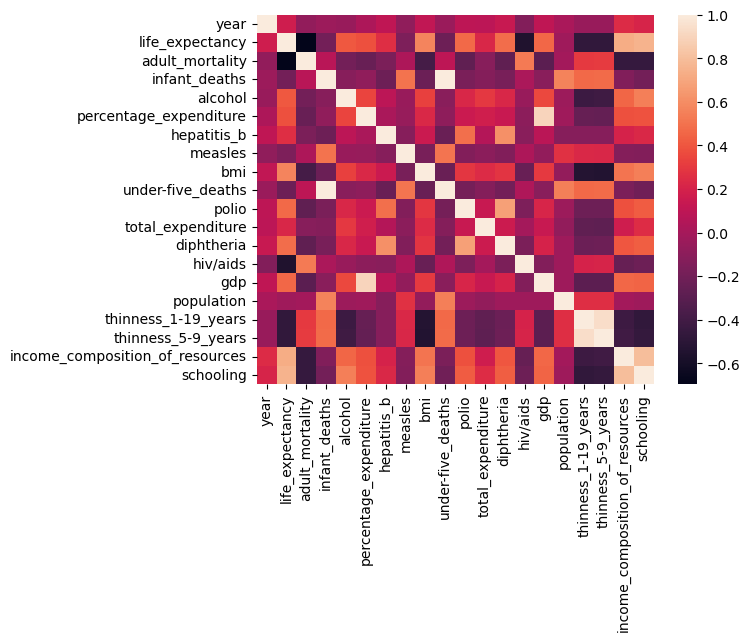

In [13]:
sns.heatmap(df.corr())
plt.show()  

Some of these varialbes are almost perfectly correlated.

## Lowess

In [27]:
lowess = sm.nonparametric.lowess
y = df[response]  

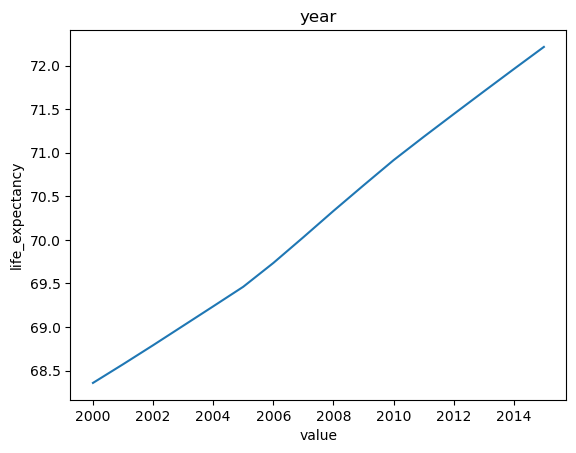

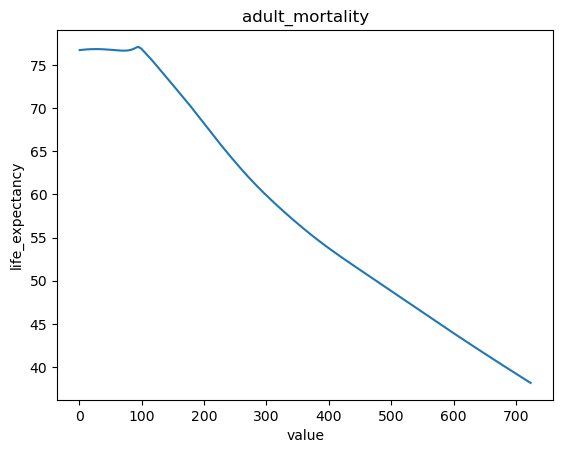

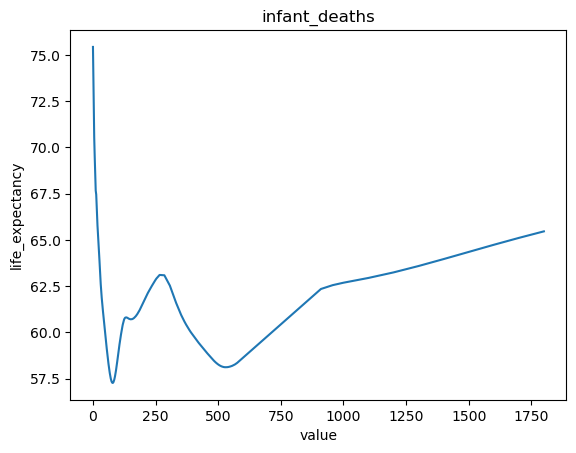

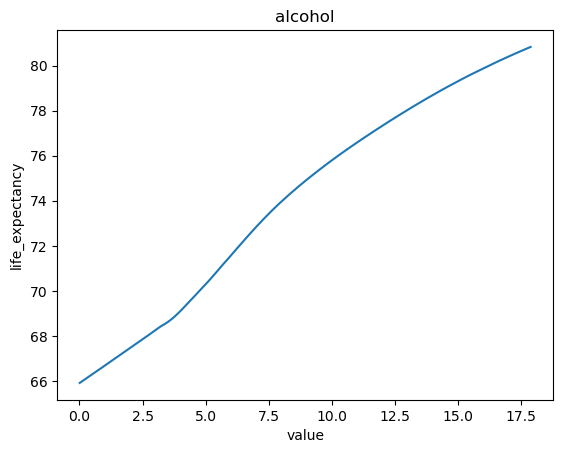

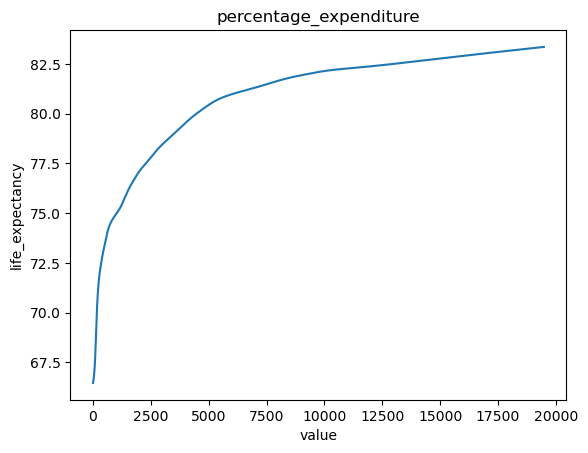

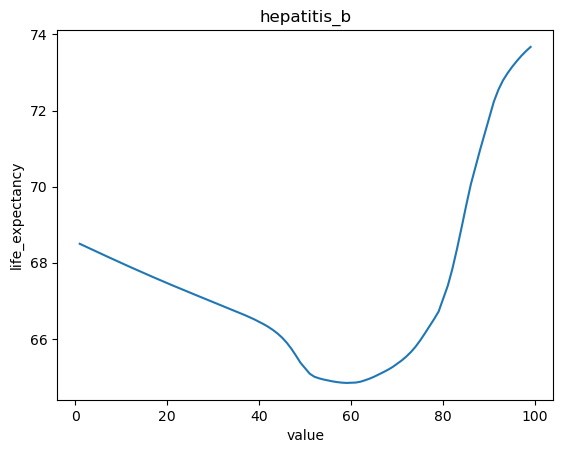

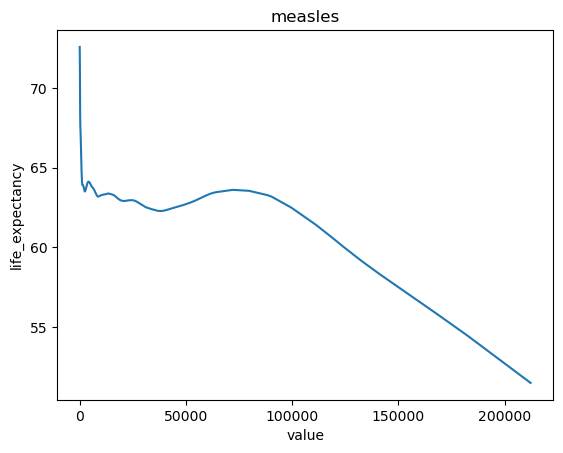

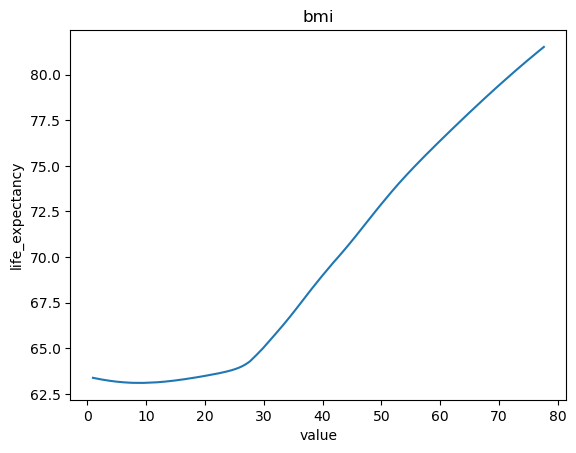

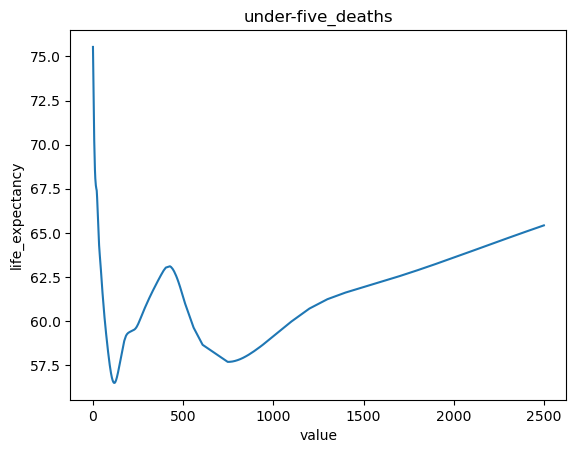

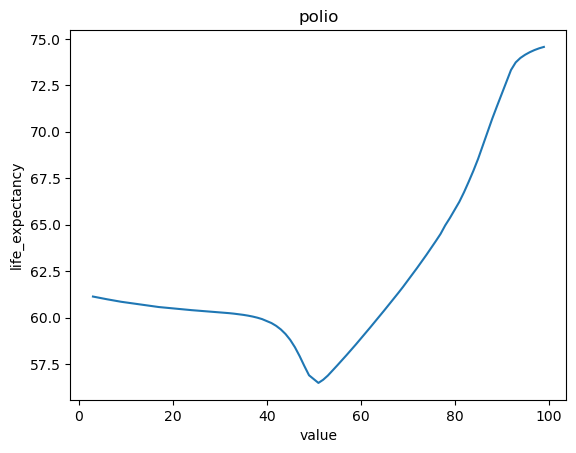

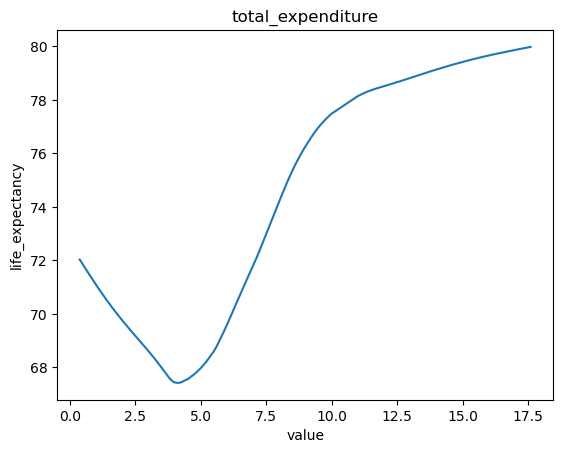

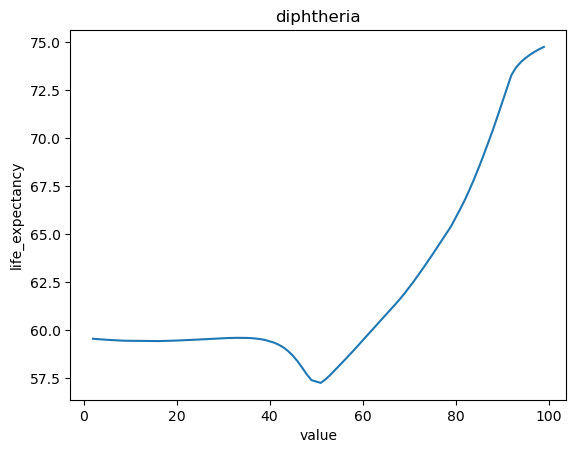

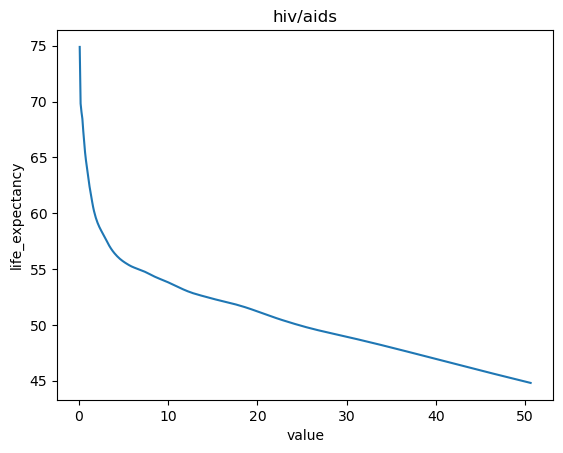

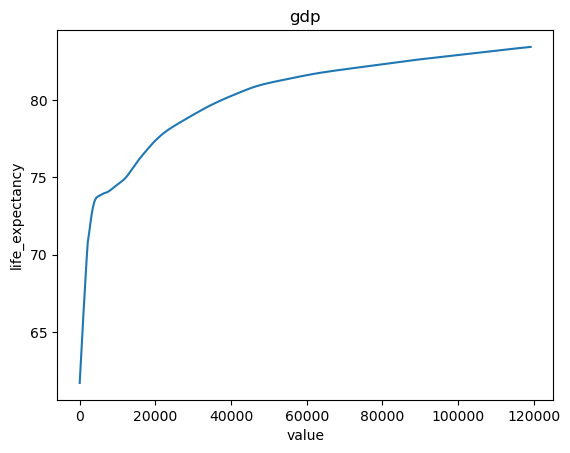

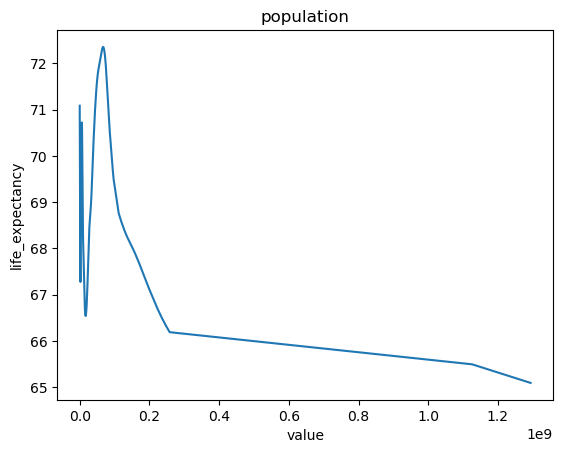

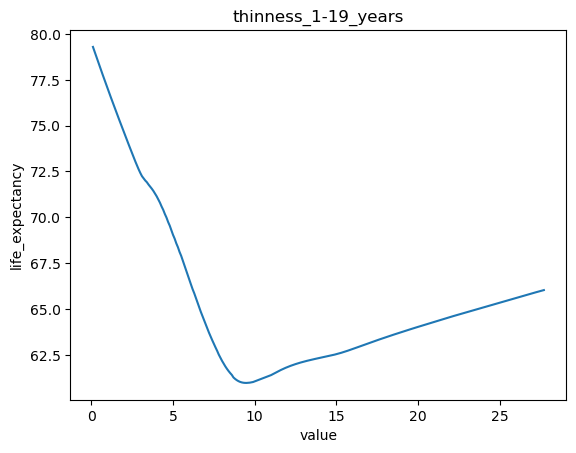

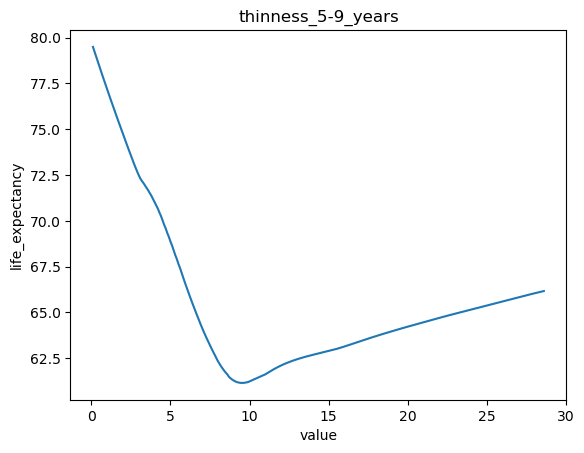

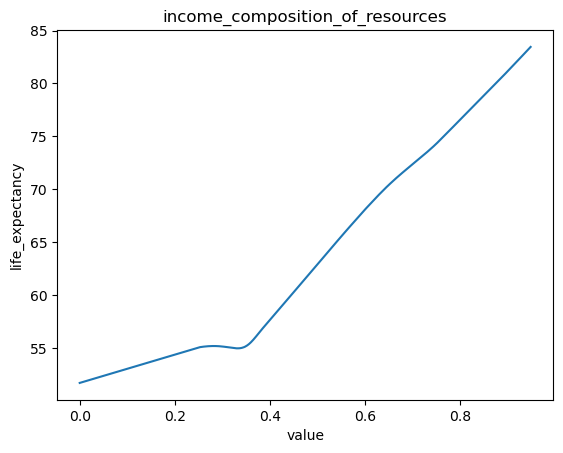

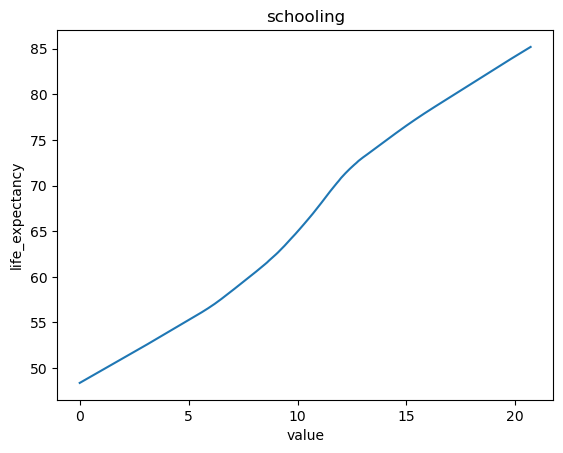

In [30]:
for var in num_cols:
    y_hat = lowess(y, df[var])
    
    plt.plot(y_hat[:,0], y_hat[:,1])
    plt.ylabel(response)
    plt.xlabel("value")
    plt.title(var)
    plt.show()

# Preprocessing

## Imputation

In [18]:
it_imp = IterativeImputer(random_state=0)

it_imp.fit(df[num_cols + [response]])

imputed = it_imp.transform(df[num_cols + [response]])

df_imp = pd.DataFrame(imputed, columns = df[num_cols + [response]].columns)

for col in cat_cols:
    df_imp[col] = df[col]

df_imp.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy,country,status
0,2015.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,Afghanistan,Developing
1,2014.0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,Afghanistan,Developing
2,2013.0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,Afghanistan,Developing
3,2012.0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,Afghanistan,Developing
4,2011.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,Afghanistan,Developing


In [19]:
df_imp.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy,country,status
0,2015.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,Afghanistan,Developing
1,2014.0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,Afghanistan,Developing
2,2013.0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,Afghanistan,Developing
3,2012.0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,Afghanistan,Developing
4,2011.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,Afghanistan,Developing


In [20]:
df_imp.isna().sum()

year                               0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
life_expectancy                    0
country                            0
status                             0
dtype: int64

## Scaling

In [21]:
ssc = StandardScaler()
ssc.fit(df_imp[num_cols])
df_imp[num_cols] = ssc.transform(df_imp[num_cols])

df_imp.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy,country,status
0,1.621762,0.791988,0.268824,-1.12759,-0.335570,-0.527262,-0.110384,-0.951230,0.255359,-3.271152,...,-0.323445,-0.455106,0.402882,2.809353,2.768993,-0.694471,-0.557022,65.0,Afghanistan,Developing
1,1.404986,0.856466,0.285786,-1.12759,-0.334441,-0.646388,-0.168124,-0.976213,0.274060,-1.046833,...,-0.323445,-0.452969,-0.215877,2.877607,2.813597,-0.708700,-0.586690,59.9,Afghanistan,Developing
2,1.188210,0.832287,0.302749,-1.12759,-0.334594,-0.566970,-0.173531,-1.001195,0.292761,-0.875731,...,-0.323445,-0.451538,0.365751,2.923109,2.858200,-0.737156,-0.616358,59.9,Afghanistan,Developing
3,0.971434,0.864525,0.328193,-1.12759,-0.332096,-0.447845,0.032045,-1.026177,0.317696,-0.661854,...,-0.323445,-0.448666,-0.153474,2.968611,2.925105,-0.770356,-0.646025,59.5,Afghanistan,Developing
4,0.754658,0.888704,0.345155,-1.12759,-0.367862,-0.408136,0.051757,-1.046163,0.342631,-0.619079,...,-0.323445,-0.494236,-0.166779,3.036865,2.969709,-0.813041,-0.735028,59.2,Afghanistan,Developing


## Labeling of categorical columns

In [22]:
for col in df_imp.columns:
    if col in cat_cols:
        print(col)
        lbl = LabelEncoder()
        lbl.fit(list(df_imp[col].values))
        df_imp[col] = lbl.transform(list(df_imp[col].values))

df_imp.head()


country
status


,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy,country,status
0,1.621762,0.791988,0.268824,-1.12759,-0.335570,-0.527262,-0.110384,-0.951230,0.255359,-3.271152,...,-0.323445,-0.455106,0.402882,2.809353,2.768993,-0.694471,-0.557022,65.0,0,1
1,1.404986,0.856466,0.285786,-1.12759,-0.334441,-0.646388,-0.168124,-0.976213,0.274060,-1.046833,...,-0.323445,-0.452969,-0.215877,2.877607,2.813597,-0.708700,-0.586690,59.9,0,1
2,1.188210,0.832287,0.302749,-1.12759,-0.334594,-0.566970,-0.173531,-1.001195,0.292761,-0.875731,...,-0.323445,-0.451538,0.365751,2.923109,2.858200,-0.737156,-0.616358,59.9,0,1
3,0.971434,0.864525,0.328193,-1.12759,-0.332096,-0.447845,0.032045,-1.026177,0.317696,-0.661854,...,-0.323445,-0.448666,-0.153474,2.968611,2.925105,-0.770356,-0.646025,59.5,0,1
4,0.754658,0.888704,0.345155,-1.12759,-0.367862,-0.408136,0.051757,-1.046163,0.342631,-0.619079,...,-0.323445,-0.494236,-0.166779,3.036865,2.969709,-0.813041,-0.735028,59.2,0,1


# Select Features

In [23]:
predictors_full = ['status',
"country",           
'year',
'adult_mortality',
'infant_deaths',
'alcohol',
'percentage_expenditure',
'hepatitis_b',
'measles',
'bmi',
'under-five_deaths',
'polio',
'total_expenditure',
'diphtheria',
'hiv/aids',
'gdp',
'population',
'thinness_1-19_years',
'thinness_5-9_years',
'income_composition_of_resources',
'schooling']   

predictors = ['status',
'infant_deaths',
'alcohol',
'percentage_expenditure',
'hepatitis_b',
'measles',
'bmi',
'under-five_deaths',
'polio',
'total_expenditure',
'diphtheria',
'hiv/aids',
'gdp',
'population',
'thinness_1-19_years',
'thinness_5-9_years',
'income_composition_of_resources',
'schooling']   

In [24]:
y = df_imp[response]
X = df_imp[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Modeling

## Mean Prediction as a baseline

In [26]:
mean = y_train.mean()

preds = np.repeat(mean, len(y_test))

In [27]:
mse = mean_squared_error(y_test, preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 87.09548550537315


## XGBoost

In [22]:
xgb_model = xgb.XGBRegressor(n_estimators = 1000)

xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 2.8691681714731496


### XGBoost XAI

#### SHAP

In [29]:
model = xgb_model

In [30]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

c:\Users\JoNo1\anaconda3\envs\geoenv\lib\site-packages\xgboost\core.py:91: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



##### Global

c:\Users\JoNo1\anaconda3\envs\geoenv\lib\site-packages\shap\plots\_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



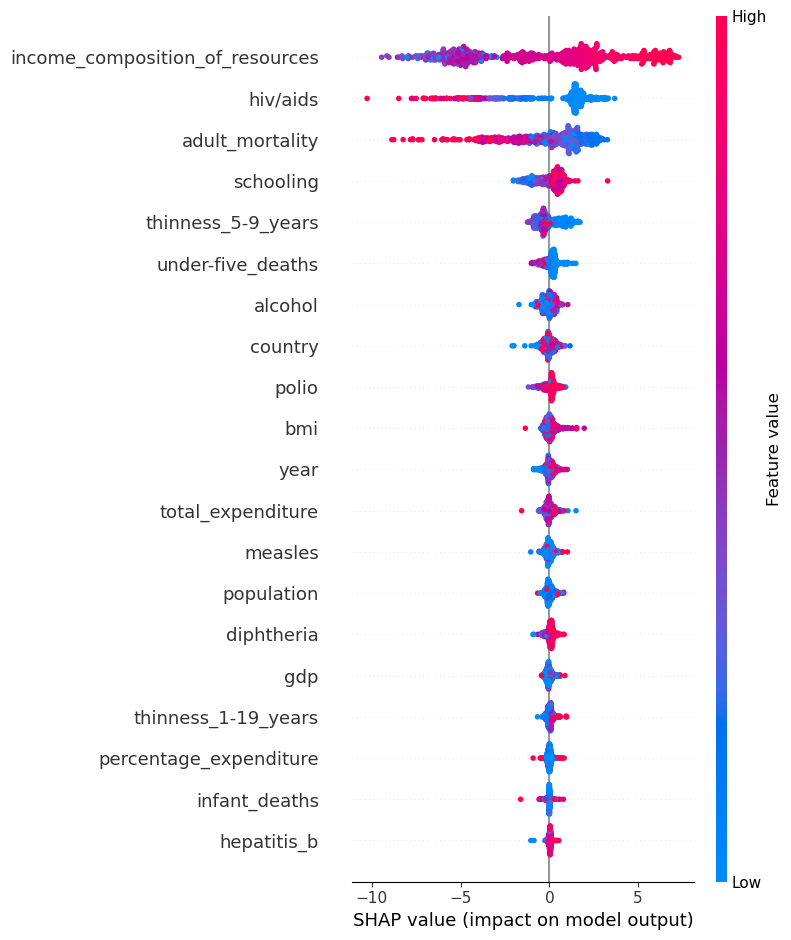

In [31]:
shap.summary_plot(shap_values, X_test)

##### Local

In [ ]:
shap.initjs()

prediction = model.predict(X_test)
index = 3 # Index of data point where we give a local explenation


print(f"The RF predicted: {prediction[index]}")
shap.force_plot(explainer.expected_value,
                shap_values[index],
                X_test.iloc[index]) # for values

### Feature Importance

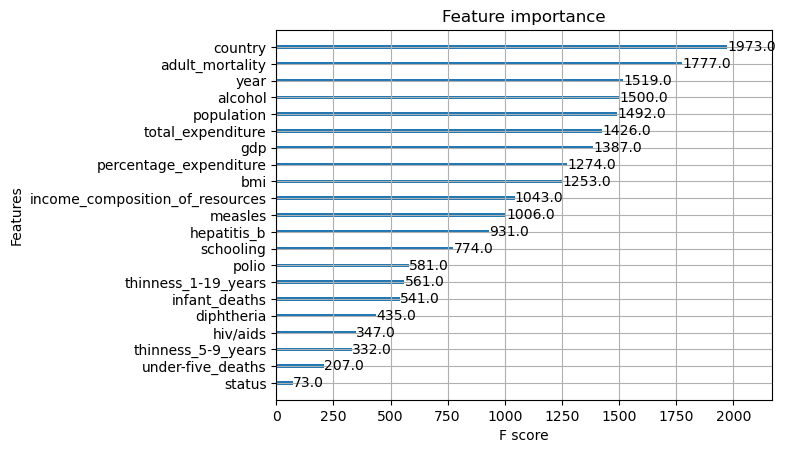

In [35]:
xgb.plot_importance(model)
plt.show()

Using country feels like cheating. We would rather predict using the attributes of each country. Year has also a highly positive correlation with life expectancy without meassuring the characteristics of the country. We exclude both in our next analysis. Adult Mortality is also uninteressting to include as a predictor for life expectancy. The correlation is obvious and uninteressting.

## XGBoost Without Country, Year and Adult Mortality

In [51]:
predictors = ['status',
'infant_deaths',
'alcohol',
'percentage_expenditure',
'hepatitis_b',
'measles',
'bmi',
'under-five_deaths',
'polio',
'total_expenditure',
'diphtheria',
'hiv/aids',
'gdp',
'population',
'thinness_1-19_years',
'thinness_5-9_years',
'income_composition_of_resources',
'schooling']   

In [52]:
y = df_imp[response]
X = df_imp[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
xgb_model = xgb.XGBRegressor(n_estimators = 1000)

xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 4.9125755788374965


As expected, the model performce worse, but the change in performance is acceptable. 

In [55]:
model = xgb_model

### Feature importance

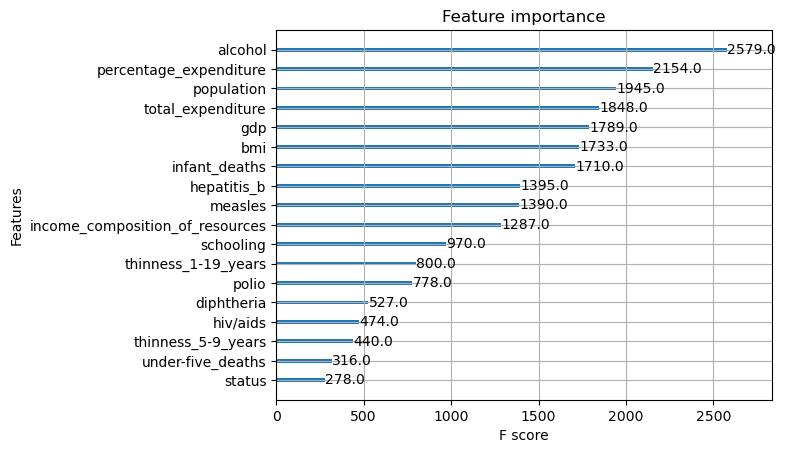

In [56]:
xgb.plot_importance(model)
plt.show()

Now alcohol consumption and expenditure on health as a percentage of Gross Domestic Product per capita(%) are the most important predictors.

### SHAP

In [57]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

c:\Users\JoNo1\anaconda3\envs\geoenv\lib\site-packages\xgboost\core.py:91: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



c:\Users\JoNo1\anaconda3\envs\geoenv\lib\site-packages\shap\plots\_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



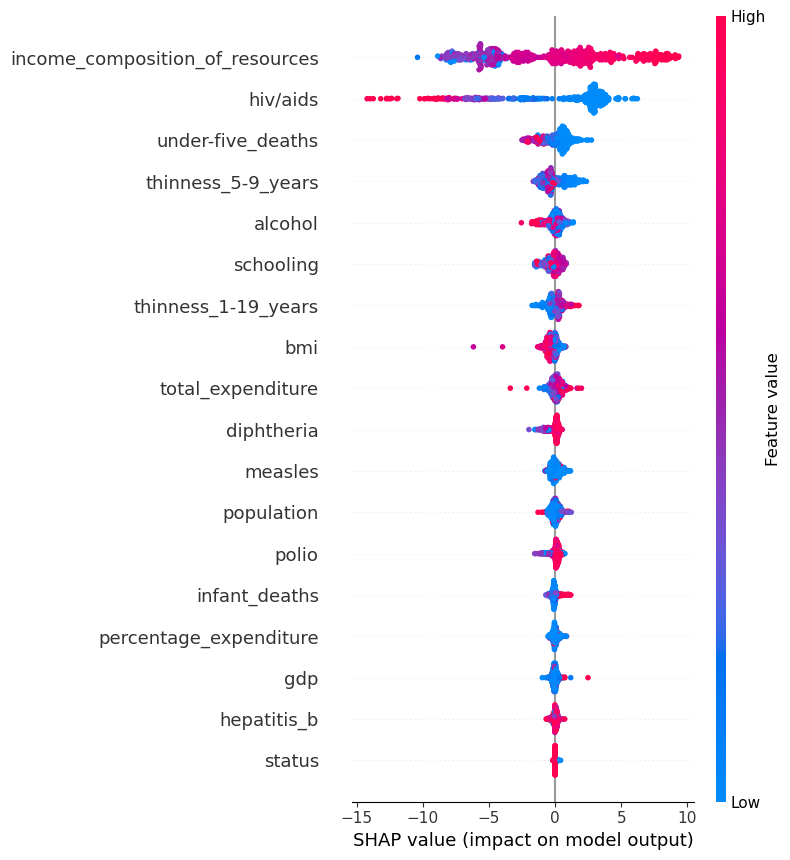

In [58]:
shap.summary_plot(shap_values, X_test)

# Explainable Boosting Machine

In [24]:
ebm = ExplainableBoostingRegressor(random_state= 1)
ebm.fit(X_train, y_train)

preds = ebm.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 3.898303994442679


In [28]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2085782759792/ -->

# Ridge Regression

In [48]:
stat_mod = sm.OLS(y_train, X_train)

stat_fit = stat_mod.fit()

stat_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        life_expectancy   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              1065.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                        00:29:00   Log-Likelihood:                         -10707.
No. Observations:                2350   AIC:                                  2.145e+04
Df Residuals:                    2332   BIC:                                  2.155e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
status                             75.2639      0.549    137.069      0.000      74.187      76.341
infant_deaths                      11.1600      6.435      1.734      0.083      -1.458      23.778
alcohol                            10.6312      0.641     16.597      0.000       9.375      11.887
percentage_expenditure              3.6811      1.146      3.213      0.001       1.434       5.928
hepatitis_b                         0.5077      0.695      0.731      0.465      -0.855       1.871
measles                            -0.1697      0.554     -0.306      0.760      -1.257       0.918
bmi                                -0.4517      0.639     -0.707      0.479      -1.704       0.801
under-five_deaths                 -10.0446      6.404     -1.569      0.117     -22.602       2.513
polio                               0.8286      0.678      1.223      0.222      -0.500       2.157
total_expenditure                   2.8378      0.527      5.387      0.000       1.805       3.871
diphtheria                         -0.0505      0.755     -0.067      0.947      -1.532       1.431
hiv/aids                           -4.7735      0.490     -9.733      0.000      -5.735      -3.812
gdp                                 3.8905      1.152      3.378      0.001       1.632       6.149
population                         -0.8733      0.624     -1.400      0.162      -2.096       0.350
thinness_1-19_years                -0.1444      1.390     -0.104      0.917      -2.869       2.581
thinness_5-9_years                 -2.0639      1.403     -1.471      0.141      -4.815       0.687
income_composition_of_resources     5.0958      0.884      5.766      0.000       3.363       6.829
schooling                           6.1557      0.945      6.514      0.000       4.303       8.009
==============================================================================
Omnibus:                      107.379   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.589
Skew:                           0.511   Prob(JB):                     8.83e-28
Kurtosis:                       3.476   Cond. No.                         44.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
stat_preds = stat_fit.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, stat_preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 484.9706370857433


# Kernel Ridge

In [46]:
kr_model = KernelRidge(kernel='rbf', gamma=0.01)

kr_model.fit(X_train, y_train)

kr_preds = kr_model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, kr_preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 17.471870906638003


# KNeighborsRegressor

In [39]:
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, knn_preds)

print("Mean Squared Error:", mse)

Mean Squared Error: 7.003522291786316
